The purpose of this notebook is to look at our data, get important stats like the number of rows, etc as well as make some graphs, and take some screenshots for the presentation.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('../Data/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Cleaning A.D.R

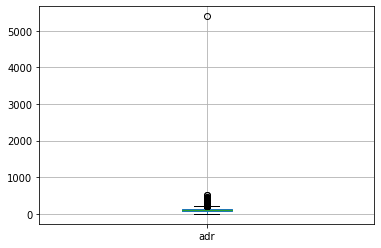

In [5]:
df.boxplot(column = "adr")
plt.show()

There is very clearly an extreme outlier. It is fair to assume that a nightly hotel rate of over $5000 while all the others are in the low hundreds is a mistake and can be removed. 

In [6]:
df = df[df["adr"] < 5000]

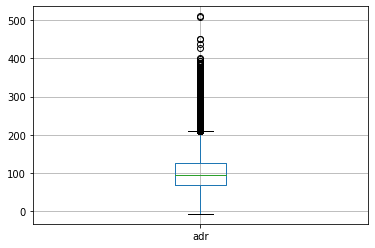

In [7]:
df.boxplot(column = "adr")
plt.show()

This is clearly a lot more believable

### Hotel

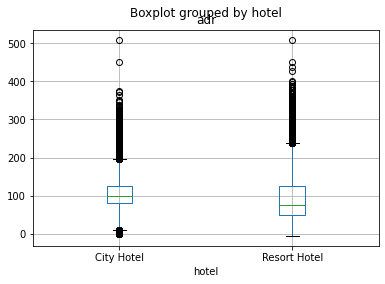

In [8]:
df.boxplot(by = "hotel", column = "adr",)
plt.show()

In order to include the catagorical data of hotel type, we one-hot encode. 

In [9]:
df["is_resort"] = (df["hotel"] =="Resort Hotel").astype(int)
df.drop(columns = "hotel", inplace = True)

### is_canceled

We are removing bookings that were canceled because it is possible that price played a role in the reason they were canceled so these bookings are not a good indicator of what people are willing to pay and may lead to inaccurate results if used. 

In [10]:
df.drop(columns = "is_canceled", inplace = True)

### lead_time

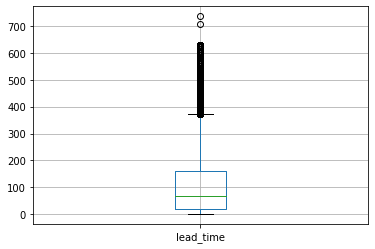

In [11]:
df.boxplot(column = "lead_time")
plt.show()
#This wil likely need to be scaled

### arrival_date_year

We are removing this because we simply do not have enough years of data to capture any sort of inflation-driven trend of prices from year to year.

In [12]:
#dropped later after the stay_length is made

### arrival_date_month 

In [13]:
df["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

Convert these to ints

In [14]:
def month_to_num(month):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    num = months.index(month)+1
    return num
df["arrival_date_month"] =df["arrival_date_month"].apply(month_to_num,convert_dtype=True)

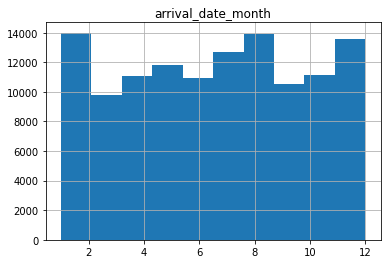

In [15]:
df.hist(column = "arrival_date_month")
plt.show()

It may be helpful to perform some sort of transformation on these predictors to capture the fact that they are cyclical <br>
https://www.real-statistics.com/multiple-regression/multiple-regression-analysis/seasonal-regression-forecasts/

### arrival_date_week_number

<AxesSubplot:>

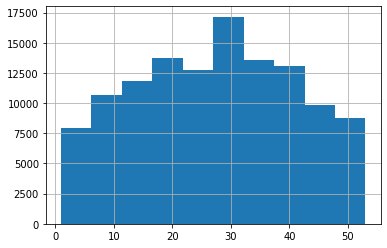

In [16]:
df["arrival_date_week_number"].hist()

Looks good, maybe some scaling or again something to capture the cyclical nature of this predictor.

### arrival_date_day_of_month  

<AxesSubplot:>

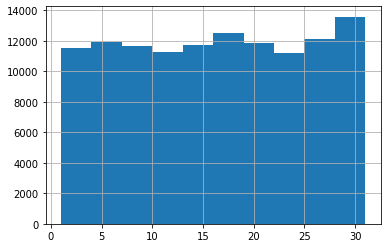

In [17]:
df["arrival_date_day_of_month"].hist()

Looks good, maybe some scaling or again something to capture the cyclical nature of this predictor.

### stays_in_weekend_nights

<AxesSubplot:>

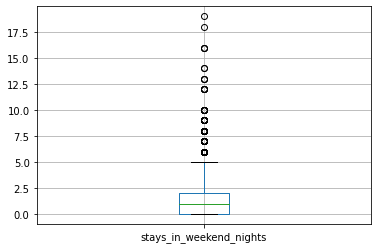

In [18]:
df.boxplot(column=["stays_in_weekend_nights"])

Looks good may need scaling

### stays_in_week_nights

<AxesSubplot:>

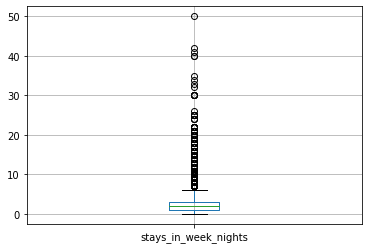

In [19]:
df.boxplot(column=["stays_in_week_nights"])

Looks good may need scaling

### adults

<AxesSubplot:>

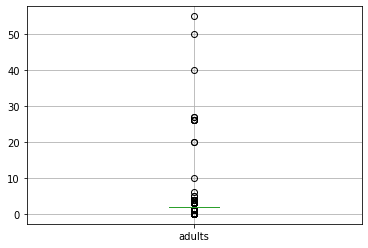

In [20]:
df.boxplot(column=["adults"])

Looks good may need scaling

### children

In [21]:
df["children"].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

Change to int and remove all nan values

In [22]:
def nan_to_0_and_int(value):
    if(np.isnan(value)):
        return 0
    else:
        return int(value)
df["children"] =df["children"].apply(nan_to_0_and_int,convert_dtype=True)

<AxesSubplot:>

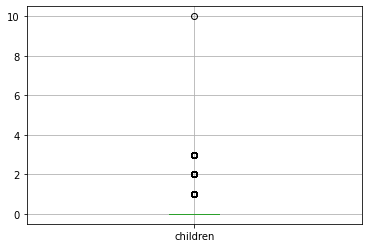

In [23]:
df.boxplot(column=["children"])

In [24]:
df["children"].unique()

array([ 0,  1,  2, 10,  3], dtype=int64)

might need scaling. 10 children seems extreme but believable

## babies

In [25]:
df["babies"].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

<AxesSubplot:>

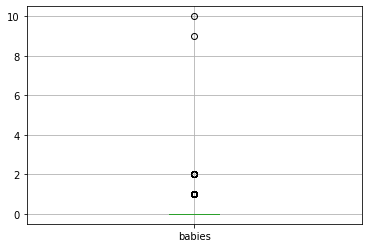

In [26]:
df.boxplot(column=["babies"])

looks good might need scaling

### meal

In [27]:
np.unique(df["meal"],return_counts=True)

(array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object),
 array([92309,   798, 14463, 10650,  1169], dtype=int64))

"BB" - breakfast only <br>
"FB" - breakfast, lunch, and dinner <br>
"HB" - dinner and breakfast <br>
"SC" - no meals <br>
<br>
Drop rows for undefined meals and translate to binary bought_meal

In [28]:
df.drop(df.loc[df["meal"]=='Undefined'].index, inplace=True)
df["bought_meal"] = (df["meal"] != 'SC').astype(int)
df.drop(columns = "meal", inplace=True)

### country

In [29]:
countries, c_freq = np.unique(list(df["country"]),return_counts=True)
print(countries, c_freq)

['ABW' 'AGO' 'AIA' 'ALB' 'AND' 'ARE' 'ARG' 'ARM' 'ASM' 'ATA' 'ATF' 'AUS'
 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA' 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR'
 'BOL' 'BRA' 'BRB' 'BWA' 'CAF' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'CN' 'COL'
 'COM' 'CPV' 'CRI' 'CUB' 'CYM' 'CYP' 'CZE' 'DEU' 'DJI' 'DMA' 'DNK' 'DOM'
 'DZA' 'ECU' 'EGY' 'ESP' 'EST' 'ETH' 'FIN' 'FJI' 'FRA' 'FRO' 'GAB' 'GBR'
 'GEO' 'GGY' 'GHA' 'GIB' 'GLP' 'GNB' 'GRC' 'GTM' 'GUY' 'HKG' 'HND' 'HRV'
 'HUN' 'IDN' 'IMN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL' 'ISR' 'ITA' 'JAM' 'JEY'
 'JOR' 'JPN' 'KAZ' 'KEN' 'KHM' 'KIR' 'KNA' 'KOR' 'KWT' 'LAO' 'LBN' 'LBY'
 'LCA' 'LIE' 'LKA' 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MCO' 'MDG' 'MDV' 'MEX'
 'MKD' 'MLI' 'MLT' 'MMR' 'MNE' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'MYT' 'NAM'
 'NCL' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL'
 'PLW' 'POL' 'PRI' 'PRT' 'PRY' 'PYF' 'QAT' 'ROU' 'RUS' 'RWA' 'SAU' 'SDN'
 'SEN' 'SGP' 'SLE' 'SLV' 'SMR' 'SRB' 'STP' 'SUR' 'SVK' 'SVN' 'SWE' 'SYC'
 'SYR' 'TGO' 'THA' 'TJK' 'TMP' 'TUN' 'TUR' 'TWN' 'TZ

If there are 15 or less historical reservations from a particular country that is not really enough to draw any conclusions so any country that has 15 or less reservations will be added to an "other" group 'OTR' along with all 'nan' entries 

In [30]:
def condense_countries(value):
    country_index = np.where(countries== value)[0]
    if(c_freq[country_index] <=15 or pd.isnull(value)):
        return 'OTR'
    else:
        return value

In [31]:
for i, row in df.iterrows():
    df.at[i, "country"] = condense_countries(df.at[i,'country'])

C:\Users\KATYLU~2\AppData\Local\Temp/ipykernel_26872/3012183276.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  country_index = np.where(countries== value)[0]
C:\Users\KATYLU~2\AppData\Local\Temp/ipykernel_26872/3012183276.py:3: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if(c_freq[country_index] <=15 or pd.isnull(value)):


In [32]:
countries, c_freq = np.unique(list(df["country"]),return_counts=True)
print(countries, c_freq)

['AGO' 'ARE' 'ARG' 'AUS' 'AUT' 'AZE' 'BEL' 'BGR' 'BLR' 'BRA' 'CHE' 'CHL'
 'CHN' 'CN' 'COL' 'CPV' 'CRI' 'CYP' 'CZE' 'DEU' 'DNK' 'DZA' 'ECU' 'EGY'
 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GEO' 'GIB' 'GRC' 'HKG' 'HRV' 'HUN' 'IDN'
 'IND' 'IRL' 'IRN' 'ISL' 'ISR' 'ITA' 'JOR' 'JPN' 'KAZ' 'KOR' 'KWT' 'LBN'
 'LTU' 'LUX' 'LVA' 'MAC' 'MAR' 'MEX' 'MLT' 'MOZ' 'MYS' 'NGA' 'NLD' 'NOR'
 'NZL' 'OMN' 'OTR' 'PER' 'PHL' 'POL' 'PRT' 'ROU' 'RUS' 'SAU' 'SGP' 'SRB'
 'SVK' 'SVN' 'SWE' 'THA' 'TUN' 'TUR' 'TWN' 'UKR' 'URY' 'USA' 'VEN' 'ZAF'] [  362    51   214   426  1263    17  2341    75    26  2222  1728    65
   999  1270    71    24    19    51   171  7286   435   103    27    32
  8271    83   446 10324 12109    22    18   128    29   100   230    34
   151  3374    83    57   669  3763    21   197    19   133    16    31
    81   287    55    16   259    85    18    67    28    34  2104   607
    74    18   893    29    40   919 47890   499   632    48    39   101
    65    57   990    59    39   248    51    68   

<AxesSubplot:>

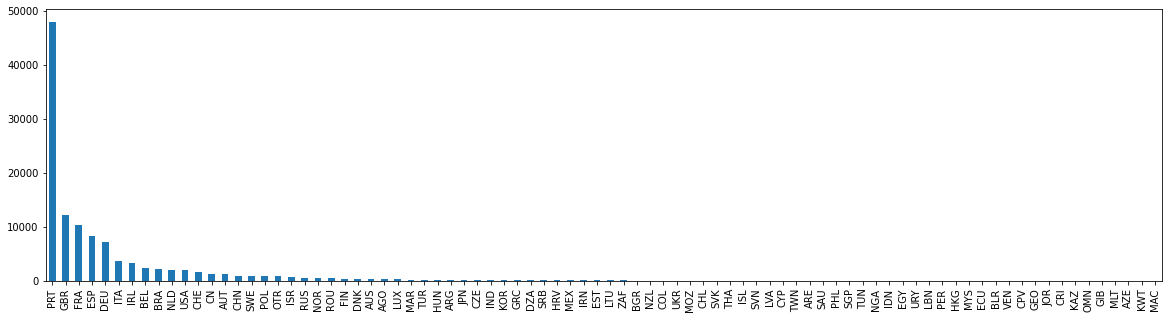

In [33]:
fig, ax = plt.subplots(figsize=(20,5))
df['country'].value_counts().plot.bar(ax=ax, rot=90)

We have 2 options here. We can one-hot encode the remaining countries OR we can change this into a binary is_international (Both hotels are located in PRT according to paper) is_international would be probably most helpful, but my guess is that or something similar will happen in PCA, is_PRT ranking much higher than any other on-hot encoded country

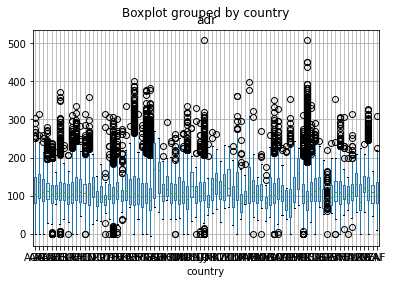

In [34]:
df.boxplot(by = "country", column = "adr",)
plt.show()

Leaning towards dropping this feature/ or converting it to is_international if we can find somehwere that the hotels are in pact in PRT

In [35]:
#df["is_international"] = (df["country"] == 'PRT').astype(int)
#If you want to do this you need to drop all nan rows

In [36]:
df.drop(columns = "country", inplace=True)

### market_segment

In [37]:
np.unique(df["market_segment"], return_counts=True)

(array(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
        'Offline TA/TO', 'Online TA', 'Undefined'], dtype=object),
 array([  237,   737,  5280, 12533, 19010, 23960, 56461,     2],
       dtype=int64))

Drop all rows for complementary stays since we don't want to predict that we should give things away for free

In [38]:
df.drop(df.loc[df["market_segment"]=="Complementary"].index, inplace=True)

In [39]:
df.drop(df.loc[df["adr"]==0].index, inplace=True)

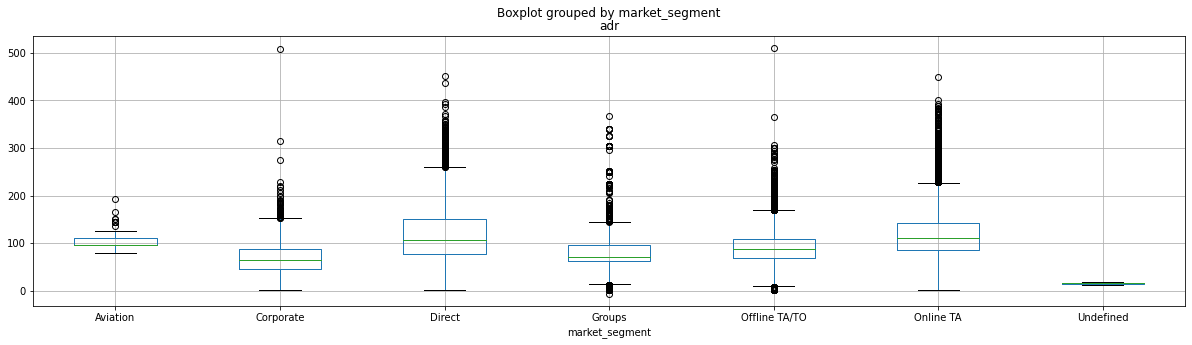

In [40]:
fig, ax = plt.subplots(figsize=(20,5))
df.boxplot(by = "market_segment", column = "adr",ax=ax)
plt.show()

one-hot encode

In [70]:
df.drop(df.loc[df["market_segment"]=="Undefined"].index, inplace=True)
df["aviation_segment"] = (df["market_segment"] =='Aviation').astype(int)
df["corporate_segment"] = (df["market_segment"] =='Corporate').astype(int)
df["groups_segment"] = (df["market_segment"] =='Groups').astype(int)
df["offline_ta_to_segment"] = (df["market_segment"] =='Offline TA/TO').astype(int)
df["online_ta_segment"] = (df["market_segment"] =='Online TA').astype(int)
df.drop(columns = "market_segment", inplace=True)

### distribution_channel

In [41]:
df["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

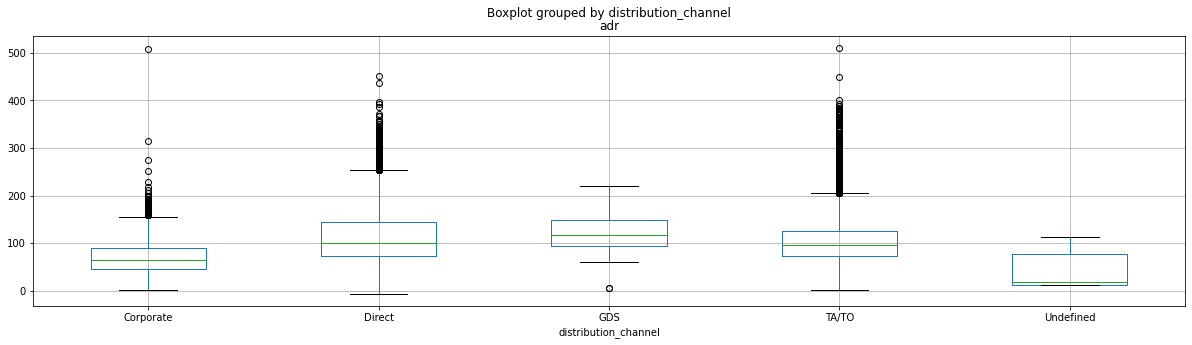

In [42]:
fig, ax = plt.subplots(figsize=(20,5))
df.boxplot(by = "distribution_channel", column = "adr",ax=ax)
plt.show()

one-hot encode, drop undefined rows 

In [72]:
df.drop(df.loc[df["distribution_channel"]=="Undefined"].index, inplace=True)
df["corporate_channel"] = (df["distribution_channel"] =='Corporate').astype(int)
df["direct_channel"] = (df["distribution_channel"] =='Direct').astype(int)
df["gds_channel"] = (df["distribution_channel"] =='GDS').astype(int)
df["ta_to_channel"] = (df["distribution_channel"] =='TA/TO').astype(int)
df.drop(columns = "distribution_channel", inplace=True)

### is_repeated_guest

In [43]:
df["is_repeated_guest"].unique()

array([0, 1], dtype=int64)

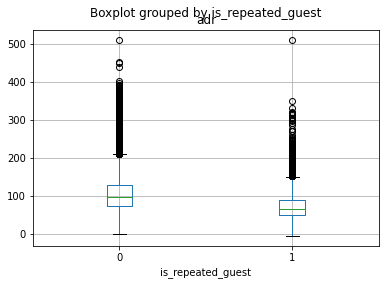

In [44]:
df.boxplot(by = "is_repeated_guest", column = "adr")
plt.show()

literally perfect as is 

### previous_cancellations

In [45]:
np.unique(df["previous_cancellations"], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6, 11, 13, 14, 19, 21, 24, 25, 26],
       dtype=int64),
 array([109918,   5933,     96,     57,     16,     14,     22,     35,
            12,     14,     19,      1,     48,     25,     26],
       dtype=int64))

may neeed scaling

### previous_bookings_not_canceled

In [46]:
np.unique(df["previous_bookings_not_canceled"], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72], dtype=int64),
 array([112904,   1437,    546,    308,    215,    166,    106,     78,
            65,     53,     46,     36,     32,     25,     23,     16,
            17,     12,     11,      9,      9,     10,      9,      6,
             8,     16,      6,      8,      6,      5,      3,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      2,      1,      1,      1,
             2,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      2,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,
     

may need scaling

### reserved_room_type/assigned_room_type

In [47]:
df["assigned_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K'],
      dtype=object)

In [48]:
df["reserved_room_type"].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

assigned_room_type/reserved_room_type codes don't actually map to anything. So we don't know which one of these is a suite and which is a king for example. The only information we could get from this is if there is any significance to them staying in a different room than was booked (for example: upgraded at checkin, free upgrade, got moved due to overbooking) however, this is not information that someone would have when trying to predict for a future stay what the price should be and therefor these will be removed.

However, we could keep "reserved room type" simply to show that there is a large/small correlation in a better room and the amount paid, or we could remove this and go for more generalized predictions independent of room type 

In [49]:
df.drop(columns = ["reserved_room_type","assigned_room_type"], inplace = True)

### booking_changes

<AxesSubplot:>

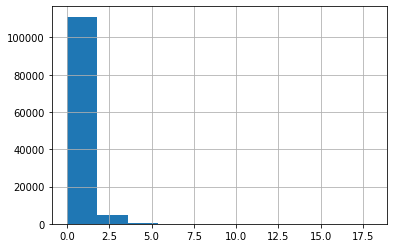

In [50]:
df["booking_changes"].hist()

scaling maybe

### deposit_type

In [51]:
df["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

one-hot encode

In [52]:
df["no_deposit"] = (df["deposit_type"] =='No Deposit').astype(int)
df["refundable_deposit"] = (df["deposit_type"] =='Refundable').astype(int)
df["nonrefundable_deposit"] = (df["deposit_type"] =='Non Refundable').astype(int)
df.drop(columns = "deposit_type", inplace=True)


### agent

In [53]:
np.unique(df["agent"], return_counts = True)

(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
         35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  44.,  47.,  50.,
         52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  63.,
         64.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
         77.,  78.,  79.,  81.,  82.,  83.,  85.,  86.,  87.,  88.,  89.,
         90.,  91.,  92.,  93.,  94.,  95.,  96.,  98.,  99., 103., 104.,
        105., 106., 107., 110., 111., 112., 114., 115., 117., 118., 119.,
        121., 122., 126., 127., 128., 129., 132., 133., 134., 135., 138.,
        139., 141., 142., 143., 144., 146., 147., 148., 149., 150., 151.,
        152., 153., 154., 155., 156., 157., 158., 159., 162., 163., 165.,
        167., 168., 170., 171., 173., 174., 175., 177., 179., 180., 181.,
        182., 183., 184., 185., 187., 

These ids correspond to different travel agents. This means nothing to us. delete

In [54]:
df.drop(columns = "agent", inplace=True)

### company

In [55]:
np.unique(df["company"], return_counts = True)

(array([  6.,   8.,   9.,  10.,  11.,  12.,  14.,  16.,  18.,  20.,  22.,
         28.,  29.,  31.,  32.,  34.,  37.,  38.,  39.,  40.,  42.,  43.,
         45.,  46.,  47.,  48.,  49.,  51.,  52.,  53.,  54.,  59.,  61.,
         62.,  64.,  65.,  67.,  68.,  71.,  72.,  73.,  76.,  77.,  78.,
         80.,  81.,  82.,  83.,  84.,  85.,  86.,  88.,  91.,  92.,  93.,
         94.,  96.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
        108., 109., 110., 112., 113., 115., 116., 118., 120., 122., 127.,
        130., 132., 135., 137., 139., 140., 142., 143., 144., 146., 148.,
        149., 150., 153., 154., 158., 159., 160., 163., 165., 167., 168.,
        169., 174., 178., 179., 180., 183., 184., 185., 186., 192., 193.,
        195., 197., 200., 202., 203., 204., 207., 209., 210., 212., 213.,
        215., 216., 217., 218., 219., 220., 221., 222., 223., 224., 225.,
        227., 229., 230., 232., 233., 237., 238., 240., 242., 243., 245.,
        246., 250., 251., 253., 254., 

Id for company that made the booking. Changing to boolean with_company

In [56]:
df["with_company"] = (pd.notnull(df["company"])).astype(int)
df.drop(columns = "company", inplace=True)

### days_in_waiting_list

In [57]:
np.unique(df["days_in_waiting_list"], return_counts = True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  53,  54,
         55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  79,  80,  81,  83,  84,
         85,  87,  89,  91,  93,  96,  97,  98,  99, 100, 101, 105, 107,
        108, 111, 113, 116, 117, 120, 121, 122, 125, 142, 147, 150, 154,
        160, 162, 165, 167, 174, 175, 176, 178, 183, 185, 187, 193, 207,
        215, 223, 224, 236, 259, 330, 379, 391], dtype=int64),
 array([112650,     12,      4,     59,     23,      7,     15,      4,
             7,     16,     28,      7,      3,      4,      4,     54,
             4,     47,      2,     30,     29,     37,     56,      3,
            19,     24,      4,     25,     50,      2,    127, 

<AxesSubplot:>

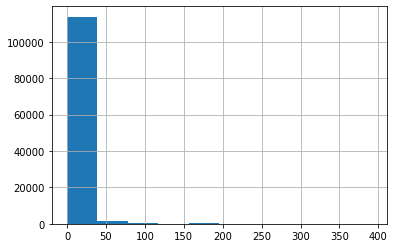

In [58]:
df["days_in_waiting_list"].hist()

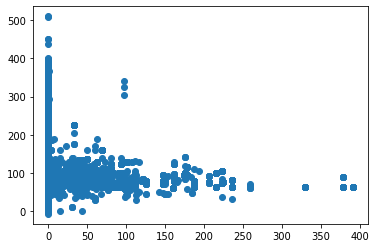

In [59]:
plt.scatter(df["days_in_waiting_list"], df["adr"])
plt.show()

scaling

droping because it will add noise to our model due to the fact that a very large majority were never on a waiting list


In [60]:
df.drop(columns = "days_in_waiting_list", inplace=True)

### customer_type

In [61]:
df["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

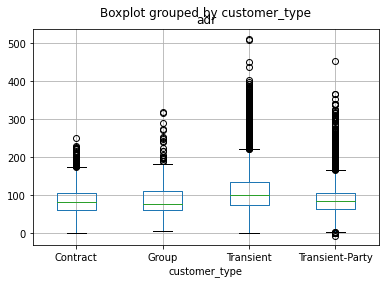

In [62]:
df.boxplot(by = "customer_type", column = "adr")
plt.show()

one-hot encoding

In [63]:
df["is_contract"] = (df["customer_type"] =='Contract').astype(int)
df["is_group"] = (df["customer_type"] =='Group').astype(int)
df["is_transient"] = (df["customer_type"] =='Transient').astype(int)
df["is_transient_party"] = (df["customer_type"] =='Transient-Party').astype(int)
df.drop(columns = "customer_type", inplace=True)

### required_car_parking_spaces

In [64]:
np.unique(df["required_car_parking_spaces"], return_counts = True)

(array([0, 1, 2, 3, 8], dtype=int64),
 array([108987,   7216,     28,      3,      2], dtype=int64))

Binary encode because most are 0 or 1

In [73]:
df["required_car_parking_spaces"] = (df["required_car_parking_spaces"] != 0).astype(int)

### total_of_special_requests 

In [65]:
df["total_of_special_requests"].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

scaling

 ### reservation_status  

In [66]:
df["reservation_status"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

we only want successful reservations

In [76]:
df = df.loc[df["reservation_status"]=='Check-Out']
df.drop(columns = "reservation_status", inplace=True)

### reservation_status_date / stay_length

For reservations that were not canceled this is the day that they checked out. We will use this to make a stay_length feature.

In [68]:
from datetime import datetime
df["reservation_status_date"] = df["reservation_status_date"].apply(lambda s: datetime.strptime(s, '%Y-%m-%d'))
df = df.reset_index()
df["check_in_date"]=pd.Series([str(df['arrival_date_month'][i]) + '/' + str(df['arrival_date_day_of_month'][i]) + '/' + str(df['arrival_date_year'][i]) for i,_ in df.iterrows()])
df["check_in_date"] = df["check_in_date"].apply(lambda s: datetime.strptime(s, '%m/%d/%Y'))
df['stay_length'] = df["reservation_status_date"] - df["check_in_date"]
df['stay_length']=df['stay_length'].apply(lambda x: int(x/ np.timedelta64(1, 'D')))
df.drop(columns = ["reservation_status_date", "arrival_date_year", "check_in_date"], inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72514 entries, 0 to 72514
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           72514 non-null  int64  
 1   lead_time                       72514 non-null  int64  
 2   arrival_date_month              72514 non-null  int64  
 3   arrival_date_week_number        72514 non-null  int64  
 4   arrival_date_day_of_month       72514 non-null  int64  
 5   stays_in_weekend_nights         72514 non-null  int64  
 6   stays_in_week_nights            72514 non-null  int64  
 7   adults                          72514 non-null  int64  
 8   children                        72514 non-null  int64  
 9   babies                          72514 non-null  int64  
 10  is_repeated_guest               72514 non-null  int64  
 11  previous_cancellations          72514 non-null  int64  
 12  previous_bookings_not_canceled  

In [ ]:
df = df.reset_index()
df.to_csv(r'../Data/clean_data.csv')